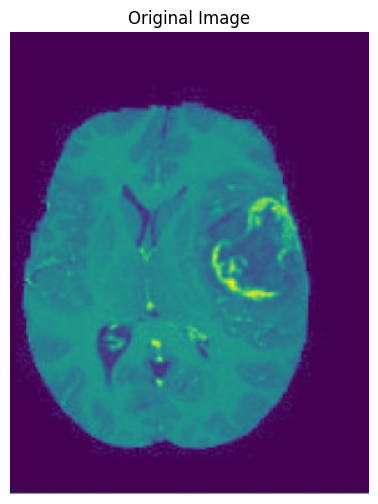

In [8]:
import cv2  # OpenCV library ko import kar rahe hain jo image processing ke liye use hoti hai
import numpy as np  # NumPy library ko import kar rahe hain jo numerical computations ke liye helpful hai
import matplotlib.pyplot as plt  # Matplotlib ka pyplot module import kar rahe hain jo image visualization ke liye use hota hai

# Image ko grayscale mode me load kar rahe hain
image = cv2.imread('img8.jpg', cv2.IMREAD_GRAYSCALE)

# RGB me convert karne ka code (comment kiya gaya hai, agar chahiye to uncomment kar sakte hain)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Figure ka size set kar rahe hain
plt.figure(figsize=(6,6))

# Image ko display kar rahe hain
plt.imshow(image)

# Image ka title set kar rahe hain
plt.title("Original Image")

# Axis ko hide kar rahe hain taki sirf image dikhe
plt.axis('off')

# Image ko show kar rahe hain
plt.show()


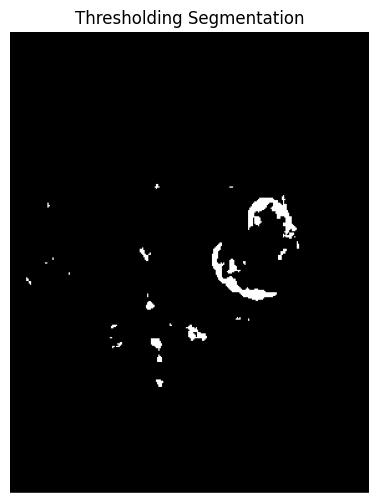

In [9]:
# Thresholding ka matlab hota hai pixel values ko binary (0 ya 255) me convert karna
# Agar pixel value 127 se zyada hai to usse 255 (white) bana denge
# Agar pixel value 127 se kam hai to usse 0 (black) bana denge

# Global Thresholding apply kar rahe hain
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Figure ka size set kar rahe hain
plt.figure(figsize=(6,6))

# Thresholded image ko display kar rahe hain (gray colormap ke sath)
plt.imshow(thresh, cmap='gray')

# Image ka title set kar rahe hain
plt.title("Thresholding Segmentation")

# Axis ko hide kar rahe hain taki sirf image dikhe
plt.axis('off')

# Image ko show kar rahe hain
plt.show()


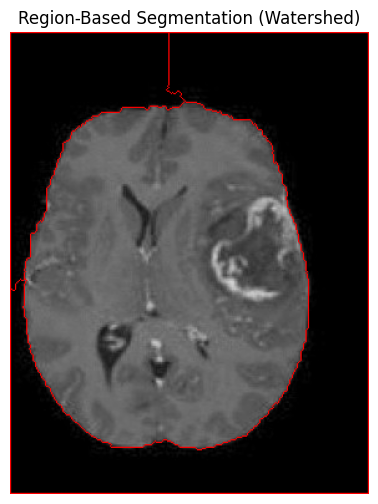

In [10]:
# Image ko color format me convert kar rahe hain (kyunki markers ke liye color image chahiye)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Otsu’s thresholding apply kar rahe hain jisse noise remove ho sake
# Ye automatically threshold value ko detect karta hai
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Sure background find karne ke liye morphological dilation apply kar rahe hain
kernel = np.ones((3,3), np.uint8)  # 3x3 ka kernel (structuring element) bana rahe hain
sure_bg = cv2.dilate(binary, kernel, iterations=3)  # Image ko 3 baar dilate kar rahe hain

# Sure foreground (object ke andar ka area) find karne ke liye distance transform apply kar rahe hain
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)  # Distance transform apply kar rahe hain
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)  # Thresholding se foreground extract kar rahe hain

# Unknown region find kar rahe hain (background aur foreground ka difference)
sure_fg = np.uint8(sure_fg)  # Foreground ko integer format me convert kar rahe hain
unknown = cv2.subtract(sure_bg, sure_fg)  # Unknown region calculate kar rahe hain

# Foreground regions ko label karne ke liye connected components find kar rahe hain
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Sab markers ko 1 se increment kar rahe hain taki background 1 ho jaye
markers[unknown == 255] = 0  # Unknown region ko 0 assign kar rahe hain

# Watershed algorithm apply kar rahe hain jisse segmentation ho sake
cv2.watershed(image_color, markers)

# Boundaries ko red color me mark kar rahe hain (markers == -1 wale pixels)
image_color[markers == -1] = [255, 0, 0]  # Red color assign kar rahe hain

# Segmented image ko show kar rahe hain
plt.figure(figsize=(6,6))
plt.imshow(image_color)
plt.title("Region-Based Segmentation (Watershed)")
plt.axis('off')  # Axis ko hide kar rahe hain
plt.show()  # Final output display kar rahe hain


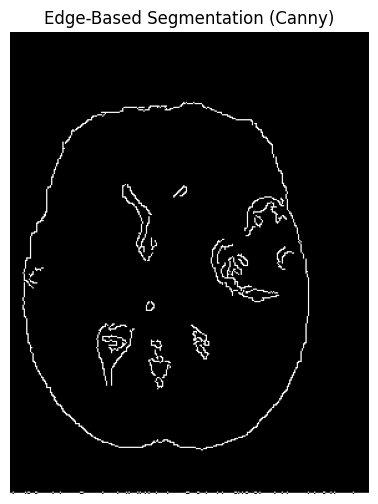

In [11]:
# Canny Edge Detection algorithm apply kar rahe hain jisse image ke edges detect ho sake
edges = cv2.Canny(image, 100, 200)  # Threshold values 100 aur 200 set kar rahe hain

# Figure ka size set kar rahe hain
plt.figure(figsize=(6,6))

# Edge-detected image ko display kar rahe hain (gray colormap ke sath)
plt.imshow(edges, cmap='gray')

# Image ka title set kar rahe hain
plt.title("Edge-Based Segmentation (Canny)")

# Axis ko hide kar rahe hain taki sirf image dikhe
plt.axis('off')

# Image ko show kar rahe hain
plt.show()
